working for programming assignment
https://www.coursera.org/learn/ml-regression/supplement/z0Uef/reading-fitting-a-simple-linear-regression-model-on-housing-data

In [1]:
import graphlab
from __future__ import division

In [2]:
houseData = graphlab.SFrame('../data/kc_house_data.gl/')
print type(houseData)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\bmt\AppData\Local\Temp\graphlab_server_1481520308.log.0


This non-commercial license of GraphLab Create for academic use is assigned to bmatthewtaylor@gmail.com and will expire on October 27, 2017.
<class 'graphlab.data_structures.sframe.SFrame'>


In [3]:
train_data,test_data = houseData.random_split(.8,seed=0)
print "train_data.shape = ", train_data.shape
print "test_data.shape = ", test_data.shape

train_data.shape =  (17384, 21)
test_data.shape =  (4229, 21)


In [4]:
#print train_data.head(2)
print train_data.column_names()

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


3. Write a generic function that accepts a column of data (e.g, an SArray) ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. Use the closed form solution from lecture to calculate the slope and intercept.

In [18]:
def simple_linear_regression(input_feature, output):
    """
    Fits intercept and slope using closed form solution in lectures
    output = input_feature x slope + intercept
    """
    numerator = 0
    sumXY = 0
    sumX = 0
    sumY = 0
    sumXX = 0
    N = len(input_feature)
    print "len(input_feature) = ", len(input_feature), ", len(input_feature) = ", len(input_feature)
    print "calculating sumX, sumY, sumXY, sum XX, long loop."
    for i in range(N):
        sumXY += input_feature[i] * output[i]
        sumX += input_feature[i]
        sumY += output[i]
        sumXX += input_feature[i]*input_feature[i]
    print "N=", N, ", sumXY = ", sumXY, ", sumX = ", sumX, ", sumY = ", sumY, ", sumXX = ", sumXX
    #numerator = (sum of X*Y) - (1/N)*((sum of X) * (sum of Y))
    numerator = sumXY*1.0 - (1.0/N)*(1.0*sumX*sumY)
    #denominator = (sum of X^2) - (1/N)*((sum of X) * (sum of X))
    denominator = sumXX*1.0 - (1.0/N)*(1.0*sumX*sumX)

    #print type(numerator), "numerator = ", numerator
    #print type(denominator), "denominator = ", denominator
    slope = numerator*1.0 / denominator
    #print "slope = ", slope
    
    meanY = sumY*1.0/N
    meanX = sumX*1.0/N
    #print "meanX = ", meanX
    #print "meanY = ", meanY
    intercept = meanY - meanX*slope
    #print "intercept = ", intercept

    #[your code here]
    #intercept = 0 
    #slope = 0
    return(intercept, slope)

In [19]:
input_feature = train_data['sqft_living']
output = train_data['price']
intercept, slope = simple_linear_regression(input_feature, output)
print "intercept = ", intercept, ", slope = ", slope

len(input_feature) =  17384 , len(input_feature) =  17384
calculating sumX, sumY, sumXY, sum XX, long loop.
N= 17384 , sumXY =  2.36662568479e+13 , sumX =  36159233.0 , sumY =  9376349465.0 , sumXX =  89977452623.0
intercept =  -47116.0765749 , slope =  281.958838568


In [20]:
graphlab.canvas.set_target('ipynb')
train_data.show(view="Scatter Plot", x="sqft_living", y="price")

In [21]:
print type(train_data)

<class 'graphlab.data_structures.sframe.SFrame'>


In [22]:
house_model = graphlab.linear_regression.create(train_data, target='price', 
                                                features=['sqft_living'],
                                                validation_set=None,verbose=False)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

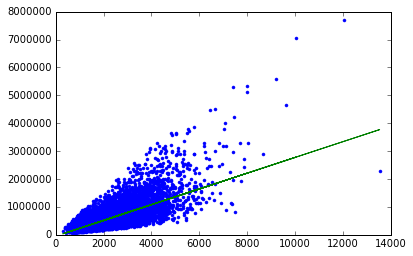

In [24]:
plt.plot(train_data['sqft_living'], train_data['price'],'.',
        train_data['sqft_living'], house_model.predict(train_data),'-')

In [25]:
print house_model.get('coefficients')
print "intercept = ", intercept, ", slope = ", slope

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -47114.0206702 | 4923.34437753 |
| sqft_living |  None | 281.957850166  | 2.16405465323 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

intercept =  -47116.0765749 , slope =  281.958838568


In [28]:
def get_regression_predictions(sqft, intercept, slope):
    return 1.0*sqft*slope+intercept

In [29]:
get_regression_predictions(2650, intercept, slope)

700074.8456294581

In [30]:
def predict_price_from_sqft_linear_regression(sqft):
    intercept = house_model.get('coefficients')['value'][0]
    slope = house_model.get('coefficients')['value'][1]
    return 1.0*sqft*slope-intercept

In [31]:
predict_price_from_sqft_linear_regression(2650)

794302.3236100874

Above is answer to programming quiz Q1

Write a function that accepts column of data: ‘input_feature’, and ‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the Residual Sum of Squares (RSS).

Recall that the RSS is the sum of the squares of the prediction errors (difference between output and prediction).

use this to answer programming quiz Q2

In [17]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    RSS = 0
    return(RSS)